In [24]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
#导入python绘图matplotlib
import matplotlib. pyplot as plt
#使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline 

In [25]:
#定义可视化图像函数
#opencv读入图像格式为BGR, matplotlib可视化格式为RGB, 因此需将BGR转RGB''
def look_img (img):
    img_RGB = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)
    plt.imshow( img_RGB)
    plt.show()

### 导入模型

In [26]:
#导入solution
mp_pose = mp.solutions.pose
# #导入绘图函数
mp_drawing = mp.solutions.drawing_utils

In [27]:
?mp_pose.Pose # 帮助文档

Object `mp_pose.Pose # 帮助文档` not found.


In [28]:
#导入模型
pose = mp_pose.Pose (static_image_mode=True,
                                #是静态图片还是连续视频帧
                                model_complexity=1,
                                #选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                                smooth_landmarks=True,
                                #是否平滑关键点
                                enable_segmentation=True,
                                #是否人体抠图
                                min_detection_confidence=0.5, #置信度阈值
                                min_tracking_confidence=0.5) # 追踪阈值

### 读入图像

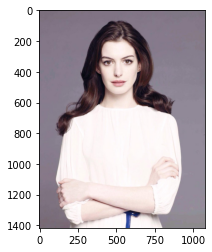

In [29]:
#从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('C:/Users/111/Pictures/Camera Roll/p2212365691.jpg')
look_img(img)

### 将图像输入模型，获取预测结果

In [30]:
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )

#将RGB图像输入模型,获取预测结果
results =pose.process(img_RGB)

In [31]:
results

mediapipe.python.solution_base.SolutionOutputs

### 可视化检测结果

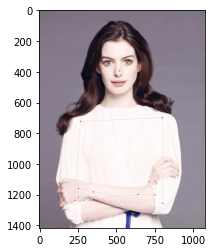

In [33]:
mp_drawing.draw_landmarks( img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
look_img(img)

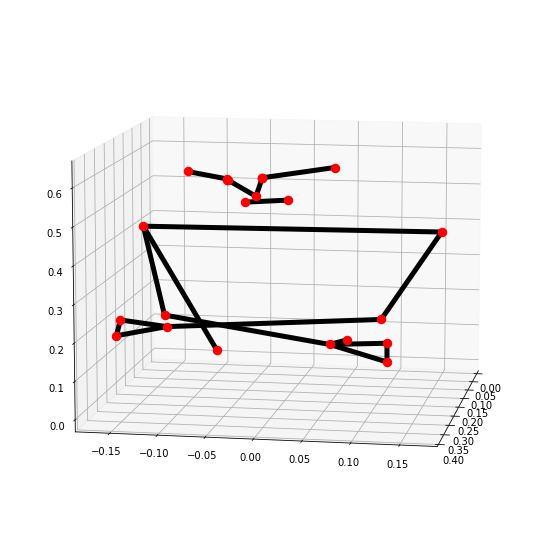

In [34]:
#在三维真实物理坐标系中可视化以米为单位的检测结果
mp_drawing.plot_landmarks (results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

### 整理代码

In [47]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
#进度条库
from tqdm import tqdm
#时间库
import time
#导入python绘图matplotlib
import matplotlib.pyplot as plt
#使用ipython的魔法方法， 将绘制出的图像直接嵌入在noteboo单元格中
%matplotlib inline

#定义可视化图像函数
def look_img(img):
    #' opencv读入图像格式为BGR, matplotlib可视化格式为RGB, 因此需将BGR转RGB'"'
    img_RGB = cv2.cvtColor( img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
#导入solution
mp_pose = mp.solutions.pose
# #导入绘图函数
mp_drawing = mp.solutions.drawing_utils
#导入模型
pose = mp_pose.Pose(static_image_mode=True,
                    #是静态图片还是连续视频帧
                    model_complexity=2,
                    #选择人体姿态关键点检测模型，0最快但性能差，2性能好但是慢
                    smooth_landmarks=True,
                    #是否平滑关键点
                    min_detection_confidence=0.5, # 置信度阈值
                    min_tracking_confidence=0.5) # 追踪阈值

#从图片文件读入图像，Opencv读入为BGR格式
img = cv2.imread('C:/Users/111/Pictures/Camera Roll/p2212365691.jpg')
# BGR转RGB
img_RGB = cv2.cvtColor (img, cv2.COLOR_BGR2RGB )
#将RGB图像输入模型，获取预测结果
results = pose.process(img_RGB)
#可视化
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
look_img(img)
#在三维直实物理必标系中可视化N米为单位的检测结里。
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS )

TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。